In [14]:
import espaloma_charge
from espaloma_charge import charge
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdFMCS
# import param_tool as pt

In [34]:
def draw_mol_with_atom_index(mol, charge_list=None, size=(600, 400)):
    """
    Добавляет номера атомов в атрибуты атомов молекулы и рисует молекулу.
    """
    if charge_list is not None and len(charge_list) == len(mol.GetAtoms()):
        for i, atom in enumerate(mol.GetAtoms()):
            atom.SetAtomMapNum(atom.GetIdx())
            atom.SetDoubleProp('PartialCharge', float(charge_list[i]))  # Преобразование в float
            atom.SetProp('atomNote', str(f"{charge_list[i]:.4f}"))
    else:
        for i, atom in enumerate(mol.GetAtoms()):
            atom.SetAtomMapNum(atom.GetIdx())

    return Draw.MolToImage(mol, size)

In [8]:
SMILES = "[H]N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C([H])=O)C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[N+](C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])C([H])([H])[H]"

In [9]:
from rdkit import Chem
molecule = Chem.MolFromSmiles(SMILES)
molecule = Chem.AddHs(molecule)

In [33]:
from espaloma_charge import charge
charge_list = list(charge(molecule))
print(f'{charge_list} \n {sum(charge_list)}')

[-0.97515535, 0.019805903, 0.67799014, -0.7639928, -0.50520945, -0.0073070284, 0.6819243, -0.79268503, -0.49795267, -0.114077285, 0.6156056, -0.58183277, -0.12693505, -0.14208202, -0.15348694, -0.15814862, 0.058345005, -0.66158104, 0.0135713015, 0.0135713015, 0.0135713015, -0.1676676, 0.38024318, 0.38024318, 0.06702723, 0.30957016, 0.08905143, 0.3176582, 0.06463857, 0.020060262, 0.05143141, 0.05143141, 0.05143141, 0.07900851, 0.07900851, 0.08014975, 0.08014975, 0.08555391, 0.08555391, 0.09489557, 0.09489557, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.061398327, 0.061398327, 0.061398327] 
 1.0281801223754883e-06


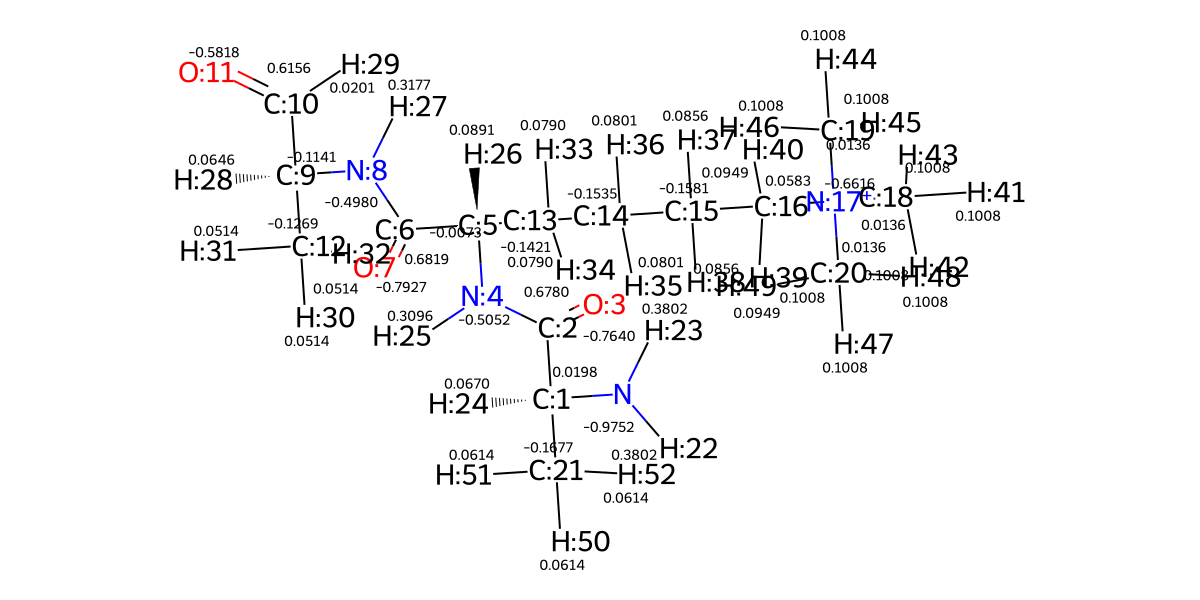

In [36]:
draw_mol_with_atom_index(molecule, charge_list=charge_list, size=(1200,600))

In [21]:
len(charge_list)

53

In [24]:
molecule.GetNumAtoms()

53

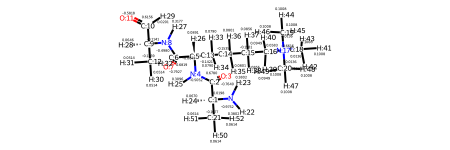

In [37]:
molecule

## Работы с QCArchive

In [1]:
import qcportal as ptl

client = ptl.PortalClient("https://qcademo.molssi.org")
print(client)

PortalClient(server_name='MolSSI QCFractal Demo Server', address='https://qcademo.molssi.org/', username='None')


In [2]:
first_record = client.get_records(1)
print(first_record)

<SinglepointRecord id=1 status=complete>


In [4]:
print(first_record.properties["scf_two_electron_energy"])

0.6644901039732637
